# Pandas
In this notebook, we'll encounter a very useful package for scientific computing in Python: Pandas. We can think of Pandas as "numpy with labels". This package is especially useful for data science and biology for a few reasons:
* Great for real-world, heterogeneous data
* Similar to Excel spreadsheets (but way faster!)
* Smartly deals with missing data

### At the end of this notebook, you'll be able to:
* Create & manipulate Pandas dataframes
* Load a tabular file of genetic data into a Pandas dataframe
* Index and subset Pandas dataframes
* Generate descriptive statistics for Pandas dataframes
<hr>

## Importing packages

Before we can pandas, we need to import it. The convention is to import `pandas` as `pd`.

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Use whos 'magic command' to see available modules
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


## Create and Manipulate Dataframes 
The two data structures of Pandas are the `Series` and the `DataFrame`. A `Series` is a one-dimensional onject similar to a list. A `DataFrame` can be thought of as a two-dimensional numpy array or a collection of `Series` objects. Series and dataframes can contain multiple different data types such as integers, strings, and floats, similar to an Excel spreadsheet. Pandas also supports `string` lables unlike numpy arrays which only have numeric labels for their rows and columns. For a more in depth explanation, please visit the [Introduction to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) section in the Pandas User Guide. 

You can create a Pandas dataframe by inputting dictionaries into the Pandas function `pd.DataFrame()`, by reading files, or through functions built into the Pandas package. The function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) reads a comma- or tab-separated file and returns it as a `dataframe`.

### Creating a data from a dictionary

Below, we'll create a dataframe from a dictionary. Since this is quite a bit to fit into one cell, we're also using a trick where we use a pair of open parentheses to tell Python to *ignore* the line breaks here.

In [2]:
# Create the dictionary
students = (
  {'FIRST_NAME': ['Daniel', 'Ben', 'Kavita', 'Linda',
                  'Omar','Jane', 'Felicia', 'Rachel',
                  'Bob'],
   'LAST_NAME': ['Smith', 'Leibstrom', 'Kanabar', 'Thiel',
                 'Reichel', 'OConner', 'Rao', 'Crock',
                 'McDonald'],
   'YEAR': [1, 1, 1, 4, 2, 2, 3, 1, 1],
   'HOME_STATE': ['NY', 'NY', 'PA', 'CA', 'OK', 'HI',
                  'NY','FL', 'FL'],
   'AGE': [18, 19, 19, 22, 21, 19, 20, 17, 18],
   'CALC_101_FINAL': [90, 80, None, 60, 70, None, None,
                      None, 98],
   'ENGLISH_101_FINAL': [80, None, None, 40, 50, None,
                         None, 60, 65]} )

# Create the dataframe from our dictionary
students_df = pd.DataFrame(students)
print(students)
print(students_df)

students_df.head(9)


{'FIRST_NAME': ['Daniel', 'Ben', 'Kavita', 'Linda', 'Omar', 'Jane', 'Felicia', 'Rachel', 'Bob'], 'LAST_NAME': ['Smith', 'Leibstrom', 'Kanabar', 'Thiel', 'Reichel', 'OConner', 'Rao', 'Crock', 'McDonald'], 'YEAR': [1, 1, 1, 4, 2, 2, 3, 1, 1], 'HOME_STATE': ['NY', 'NY', 'PA', 'CA', 'OK', 'HI', 'NY', 'FL', 'FL'], 'AGE': [18, 19, 19, 22, 21, 19, 20, 17, 18], 'CALC_101_FINAL': [90, 80, None, 60, 70, None, None, None, 98], 'ENGLISH_101_FINAL': [80, None, None, 40, 50, None, None, 60, 65]}
  FIRST_NAME  LAST_NAME  YEAR HOME_STATE  AGE  CALC_101_FINAL  \
0     Daniel      Smith     1         NY   18            90.0   
1        Ben  Leibstrom     1         NY   19            80.0   
2     Kavita    Kanabar     1         PA   19             NaN   
3      Linda      Thiel     4         CA   22            60.0   
4       Omar    Reichel     2         OK   21            70.0   
5       Jane    OConner     2         HI   19             NaN   
6    Felicia        Rao     3         NY   20             

,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
1,Ben,Leibstrom,1,NY,19,80.0,NaN
2,Kavita,Kanabar,1,PA,19,NaN,NaN
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0
5,Jane,OConner,2,HI,19,NaN,NaN
6,Felicia,Rao,3,NY,20,NaN,NaN
7,Rachel,Crock,1,FL,17,NaN,60.0
8,Bob,McDonald,1,FL,18,98.0,65.0


We can access a list of all of the students' last names using the following notation: `df['column_name']`.

In [3]:
# Access LAST_NAME column
print(students_df['LAST_NAME'])
student_last_names = students_df['LAST_NAME']


0        Smith
1    Leibstrom
2      Kanabar
3        Thiel
4      Reichel
5      OConner
6          Rao
7        Crock
8     McDonald
Name: LAST_NAME, dtype: object


One column of the dataframe is a **series**.

In [4]:
# Check type of column
type(student_last_names)
print(list(student_last_names))

['Smith', 'Leibstrom', 'Kanabar', 'Thiel', 'Reichel', 'OConner', 'Rao', 'Crock', 'McDonald']


### Reading from a file example
Below we will create a dataframe by reading the file `brainarea_vs_genes_exp_w_reannotations.tsv` which contains information on gene expression accross multiple brain areas. we'll use the `read_csv` function to import our gene expression data as a DataFrame.

>**About this dataset:**
This dataset was created by Derek Howard and Abigail Mayes for the purpose of accelerating advances in data mining of open brain transcriptome data for polygenetic brain disorders. The data comes from normalized microarray datasets of gene expression from 6 adult human brains that was released by the Allen Brain Institute and then processed into the dataframe we will see below. For more information on this dataset please visit the <a href = "https://github.com/derekhoward/HBAsets"> HBAsets repository</a>. 

Below, we'll use the `pandas.read_csv` function to import our gene expression data as a **data frame**.

In [5]:
# Read in the list of lists as a data frame
# Note "delimiter" from loadtxt is "sep" here
gene_df = pd.read_csv('Data/brainarea_vs_genes_exp_w_reannotations.tsv',sep='\t')

#Show the first five rows
gene_df.head(5)

,gene_symbol,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
0,A1BG,0.856487,-1.773695,-0.678679,-0.986914,0.826986,0.948039,0.935427,1.120774,-1.018554,...,0.277830,0.514923,0.733368,-0.104286,-0.910245,1.039610,-0.155167,-0.444398,-0.901361,-0.236790
1,A1BG-AS1,0.257664,-1.373085,-0.619923,-0.636275,0.362799,0.353296,0.422766,0.346853,-0.812015,...,1.074116,0.821031,1.219272,0.901213,-1.522431,0.598719,-1.709745,-0.054156,-1.695843,-1.155961
2,A1CF,-0.089614,-0.546903,0.282914,-0.528926,0.507916,0.577696,0.647671,0.306824,0.089958,...,-0.030265,-0.187367,-0.428358,-0.465863,-0.136936,1.229487,-0.110680,-0.118175,-0.139776,0.123829
3,A2M,0.552415,-0.635485,-0.954995,-0.259745,-1.687391,-1.756847,-1.640242,-1.733110,-0.091695,...,-0.058505,0.207109,-0.161808,0.183630,0.948098,-0.977692,0.911896,-0.499357,1.469386,0.557998
4,A2ML1,0.758031,1.549857,1.262225,1.338780,-0.289888,-0.407026,-0.358798,-0.589988,0.944684,...,-0.472908,-0.598317,-0.247797,-0.282673,1.396365,0.945043,0.158202,0.572771,0.073088,-0.886780


At the moment, the first column  of information above, called the **index**, just contains a list of numbers. We can reassign the row labels by using the method `set_index()`. We can choose any column in our present dataframe to be the row values. Let's assign the row lables to be the `gene_symbol` and reassign the dataframe. 

In [6]:
row_index = 'gene_symbol'
gene_df = gene_df.set_index(row_index)
gene_df.head()

,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,Heschl's gyrus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.856487,-1.773695,-0.678679,-0.986914,0.826986,0.948039,0.935427,1.120774,-1.018554,0.170282,...,0.277830,0.514923,0.733368,-0.104286,-0.910245,1.039610,-0.155167,-0.444398,-0.901361,-0.236790
A1BG-AS1,0.257664,-1.373085,-0.619923,-0.636275,0.362799,0.353296,0.422766,0.346853,-0.812015,0.903358,...,1.074116,0.821031,1.219272,0.901213,-1.522431,0.598719,-1.709745,-0.054156,-1.695843,-1.155961
A1CF,-0.089614,-0.546903,0.282914,-0.528926,0.507916,0.577696,0.647671,0.306824,0.089958,0.149820,...,-0.030265,-0.187367,-0.428358,-0.465863,-0.136936,1.229487,-0.110680,-0.118175,-0.139776,0.123829
A2M,0.552415,-0.635485,-0.954995,-0.259745,-1.687391,-1.756847,-1.640242,-1.733110,-0.091695,0.003428,...,-0.058505,0.207109,-0.161808,0.183630,0.948098,-0.977692,0.911896,-0.499357,1.469386,0.557998
A2ML1,0.758031,1.549857,1.262225,1.338780,-0.289888,-0.407026,-0.358798,-0.589988,0.944684,-0.466327,...,-0.472908,-0.598317,-0.247797,-0.282673,1.396365,0.945043,0.158202,0.572771,0.073088,-0.886780


It would help to know what information is in our dataset. In other words, what is across the columns at the top? We can get a list by accessing the `columns` attribute. 

In [7]:
# Access the columns of our dataframe 
gene_index = gene_df.columns
print(gene_index)
type(gene_index)

Index(['CA1 field', 'CA2 field', 'CA3 field', 'CA4 field',
       'Crus I, lateral hemisphere', 'Crus I, paravermis',
       'Crus II, lateral hemisphere', 'Crus II, paravermis',
       'Edinger-Westphal nucleus', 'Heschl's gyrus',
       ...
       'temporal pole, inferior aspect', 'temporal pole, medial aspect',
       'temporal pole, superior aspect', 'transverse gyri',
       'trochlear nucleus', 'tuberomammillary nucleus',
       'ventral tegmental area', 'ventromedial hypothalamic nucleus',
       'vestibular nuclei', 'zona incerta'],
      dtype='object', length=232)


pandas.core.indexes.base.Index

## Indexing Dataframes

Indexing in Pandas works slightly different than in NumPy. Similar to a dictionary, we can index dataframes by their names. 

The syntax for indexing single locations in a dataframe is `dataframe.loc[row_label,column_label]`. To index an individual column, we use the shorthand syntax `dataframe.[column_label]`. To index an individual row, we use the syntax `dataframe.loc[row_label]`. To index by index #, we use the syntax `dataframe.iloc[index_number]`. Below are some examples on how to access rows, columns, and single values in our dataframe. For more information on indexing dataframes, visit the <a href = "https://pandas.pydata.org/docs/user_guide/indexing.html#indexing"> "Indexing and selecting data"</a> section in the Pandas User Guide.

In [8]:
# Select a single column
column = 'CA1 field'
print('Gene expression values in CA1 field:')
print(gene_df[column])
gene_df[['CA1 field','CA2 field']].head(len(gene_index))

Gene expression values in CA1 field:
gene_symbol
A1BG        0.856487
A1BG-AS1    0.257664
A1CF       -0.089614
A2M         0.552415
A2ML1       0.758031
              ...   
ZYG11A     -0.496398
ZYG11B     -0.856866
ZYX        -1.941816
ZZEF1      -0.015748
ZZZ3       -0.924901
Name: CA1 field, Length: 20869, dtype: float64


,CA1 field,CA2 field
gene_symbol,,
A1BG,0.856487,-1.773695
A1BG-AS1,0.257664,-1.373085
A1CF,-0.089614,-0.546903
A2M,0.552415,-0.635485
A2ML1,0.758031,1.549857
...,...,...
ACTR3,3.066722,4.172880
ACTR3B,1.593826,0.989616
ACTR3BP2,2.601121,2.077106


In [9]:
# Select a single row
row = 'A1BG'
print('Gene expression of ', row, ' across brain regions:')
gene_df.loc[row]

Gene expression of  A1BG  across brain regions:


CA1 field                            0.856487
CA2 field                           -1.773695
CA3 field                           -0.678679
CA4 field                           -0.986914
Crus I, lateral hemisphere           0.826986
                                       ...   
tuberomammillary nucleus             1.039610
ventral tegmental area              -0.155167
ventromedial hypothalamic nucleus   -0.444398
vestibular nuclei                   -0.901361
zona incerta                        -0.236790
Name: A1BG, Length: 232, dtype: float64

In [10]:
# Select an individual value 
print('Gene expression of A1BG in CA1 field:')
gene_df.loc[row, column]

Gene expression of A1BG in CA1 field:


0.8564873784944677

To select multiple different columns, you can use a `list` of all your columns of interest as so:

In [11]:
# Dataframe w/ only CA field entries 
CA_field_df = gene_df[['CA1 field', 
                       'CA2 field', 
                       'CA3 field', 
                       'CA4 field']]
CA_field_df.head()

Habenula_index = [col_name for col_name in gene_index if 'habenula' in col_name]
Habenula_df = gene_df[Habenula_index]
Habenula_df.head()

,lateral habenular nucleus,medial habenular nucleus
gene_symbol,,
A1BG,-0.158792,-1.175020
A1BG-AS1,-1.386269,-0.613350
A1CF,1.339014,-0.140606
A2M,1.334008,0.982285
A2ML1,1.032062,-0.525388


## Subsetting dataframes

Like NumPy arrays, we can subset our original dataframe to only include data that meets our criteria. Our dataframe has data on multiple different brain areas with many gene expression values. You can filter this dataframe using the following syntax:
```
new_df = original_df[original_df['Column of Interest'] == 'Desired Value']
```
In plain english, what this is saying is: save a dataframe from the original dataframe, where the original dataframe values in my Column of Interest are equal to my Desired Value. For more information on subsetting,  visit the <a href = "https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html"> "How do I select a subset of a DataFrame"</a> section in the Pandas documentation. 

Below we will demonstrate how to execute this by taking a look at the `CA1 field` column in `gene_df`. We will create a dataframe from `gene_df` that only contains genes that showed a certain level of gene expression. 

In [12]:
# Create a dataframe with only genes that have an expression 
# value greater than 1.7 in 'CA1 field' 
gene_high_CA1_df = gene_df[gene_df['CA1 field']>1.7]
gene_high_CA1_df.head()

,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,Heschl's gyrus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ABCC12,2.089999,0.684837,0.097313,-0.051411,-1.078900,-0.912071,-1.131497,-0.799075,-0.009423,0.889132,...,1.289340,0.885886,1.271053,0.650801,-0.083413,-0.793237,-0.499512,-0.762330,-0.902496,-0.904421
ABHD17C,1.716973,0.601041,1.132500,1.354679,-0.923195,-0.887576,-1.122027,-0.926876,0.339678,0.208174,...,0.530983,0.809101,0.763170,-0.093598,-0.313468,-0.164013,-0.537971,1.169105,-0.663245,-0.377181
ABI1,2.051762,2.571777,2.472188,2.261170,0.366138,0.507783,0.449606,0.498424,-1.365242,0.472104,...,0.868471,1.197022,0.914783,0.473846,-2.230209,-0.330684,-1.153189,-0.073650,-1.681602,-1.049258
ACTB,2.489711,2.806688,2.461655,2.340131,-1.296731,-1.334696,-1.158460,-1.461027,0.088209,0.027236,...,-0.370215,-0.946920,-0.197363,-0.094468,0.926183,-0.034337,0.803164,-0.389238,0.596916,0.110921
ACTR2,2.655049,2.384445,1.728348,1.413585,-1.377474,-1.207922,-1.496018,-1.359462,0.632764,0.259402,...,0.215683,0.142880,0.080649,0.312218,1.793563,-0.028263,-0.189930,-0.389064,-0.484580,-1.478232


## DataFrame Methods

Pandas has many useful methods that you can use on your data, including `describe`, `mean`, and more. To learn more about all the different methods that can be used to manipulate and analyze dataframes, please visit the <a href = "https://pandas.pydata.org/docs/user_guide/index.html"> Pandas User Guide </a>. We will demonstrate some of these methods below. 

The `describe` method returns descriptive statistics of all the columns in our dataframe. 

In [13]:
gene_df.describe()

,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,Heschl's gyrus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
count,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,...,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000
mean,0.003664,0.017002,0.015315,-0.016633,0.093686,0.088810,0.096118,0.087608,0.047124,-0.042517,...,-0.056050,-0.051731,-0.049905,-0.039528,0.059726,0.014856,0.009535,-0.002853,-0.002527,0.013018
std,0.924456,1.129368,1.078987,0.897192,1.146146,1.118501,1.172986,1.136823,0.973224,0.500526,...,0.567950,0.651098,0.636729,0.494012,1.158916,0.897387,0.686320,0.830602,0.723977,0.725770
min,-4.076424,-5.923691,-5.994731,-3.971984,-2.739924,-2.662897,-2.908676,-2.864308,-3.671242,-1.666268,...,-1.840486,-2.433961,-2.412614,-1.655962,-6.330275,-3.141490,-1.977225,-3.541112,-2.369304,-2.348784
25%,-0.570475,-0.644093,-0.631248,-0.573605,-0.802651,-0.778933,-0.824404,-0.794683,-0.651691,-0.414882,...,-0.472481,-0.517562,-0.529458,-0.404416,-0.751329,-0.602619,-0.497988,-0.542164,-0.532177,-0.493921
50%,-0.025821,0.011189,0.006140,-0.044566,0.100558,0.098665,0.109358,0.096585,0.022760,-0.057495,...,-0.091029,-0.083971,-0.089572,-0.051758,0.037410,-0.030474,-0.023799,-0.023471,-0.045003,-0.031623
75%,0.561571,0.706946,0.706398,0.547903,0.985159,0.951919,1.007791,0.960813,0.736614,0.312739,...,0.352796,0.412321,0.403382,0.310551,0.844723,0.587382,0.503613,0.508410,0.501191,0.492262
max,7.062717,7.387742,6.413603,7.178692,2.679149,2.717237,2.963899,2.857205,7.552440,2.234669,...,2.199291,2.631498,3.065735,2.238555,6.892682,5.968364,7.267837,6.650673,2.723777,2.845665


The `mean` and `std` method return the mean and standard deviation of each column in the dataframe, respectfully. 

In [14]:
# Try df.mean()
print(gene_df.mean(axis=0))
print(gene_df.mean(axis=1))

CA1 field                            0.003664
CA2 field                            0.017002
CA3 field                            0.015315
CA4 field                           -0.016633
Crus I, lateral hemisphere           0.093686
                                       ...   
tuberomammillary nucleus             0.014856
ventral tegmental area               0.009535
ventromedial hypothalamic nucleus   -0.002853
vestibular nuclei                   -0.002527
zona incerta                         0.013018
Length: 232, dtype: float64
gene_symbol
A1BG       -0.014785
A1BG-AS1   -0.031155
A1CF       -0.009289
A2M        -0.007795
A2ML1       0.002128
              ...   
ZYG11A      0.035642
ZYG11B     -0.020761
ZYX        -0.005988
ZZEF1       0.007043
ZZZ3       -0.009859
Length: 20869, dtype: float64


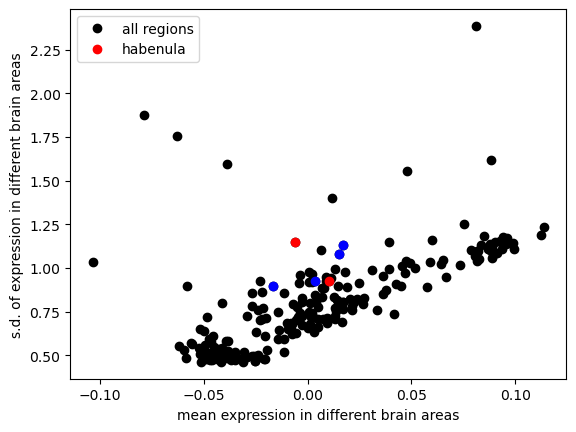

In [15]:
# Try df.std()
gene_df.std()

plt.plot(gene_df.mean(),gene_df.std(),'ok')
plt.plot(gene_df[Habenula_index].mean(),gene_df[Habenula_index].std(),'or')
plt.plot(CA_field_df.mean(),CA_field_df.std(),'ob')
plt.legend(['all regions','habenula'])
plt.xlabel('mean expression in different brain areas')
plt.ylabel('s.d. of expression in different brain areas')
plt.show()

In [35]:
corr_expression_region = gene_df.corr()
cov_expression_region = gene_df.cov()
print(type(corr_expression_region))
corr_expression_region.head()

<class 'pandas.core.frame.DataFrame'>


,CA1 field,CA2 field,CA3 field,CA4 field,"Crus I, lateral hemisphere","Crus I, paravermis","Crus II, lateral hemisphere","Crus II, paravermis",Edinger-Westphal nucleus,Heschl's gyrus,...,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect",transverse gyri,trochlear nucleus,tuberomammillary nucleus,ventral tegmental area,ventromedial hypothalamic nucleus,vestibular nuclei,zona incerta
CA1 field,1.000000,0.737685,0.661029,0.609341,-0.268489,-0.277151,-0.270338,-0.285329,0.031296,0.007089,...,0.168843,0.216662,0.235541,0.005798,0.000217,0.084214,-0.118206,0.142059,-0.185051,-0.250184
CA2 field,0.737685,1.000000,0.892899,0.752649,-0.180788,-0.192734,-0.182690,-0.201254,0.079910,0.002824,...,0.043766,0.033702,0.108416,-0.025213,0.115945,0.116234,-0.142688,0.109060,-0.190959,-0.326491
CA3 field,0.661029,0.892899,1.000000,0.887356,-0.170635,-0.187651,-0.171908,-0.196428,0.136937,-0.050708,...,-0.002889,-0.009277,0.061531,-0.080816,0.110094,0.088876,-0.099820,0.139172,-0.136465,-0.288640
CA4 field,0.609341,0.752649,0.887356,1.000000,-0.236125,-0.255682,-0.237022,-0.264372,0.168769,-0.132833,...,-0.027715,0.003304,0.017038,-0.156634,0.071167,0.082950,0.029648,0.179188,0.001193,-0.140752
"Crus I, lateral hemisphere",-0.268489,-0.180788,-0.170635,-0.236125,1.000000,0.978542,0.991738,0.968145,-0.283972,-0.137520,...,-0.270986,-0.247935,-0.206063,-0.161456,-0.290721,-0.308491,-0.420336,-0.216739,-0.323785,-0.238528


In [32]:
A_genes = [gname for gname in gene_df.index if gname[0] == 'A']
# print(A_genes)
corr_expression_gene = gene_df.transpose()[A_genes].corr()
print(type(corr_expression_gene))
corr_expression_gene.head()

<class 'pandas.core.frame.DataFrame'>


gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,AWAT2,AXDND1,AXIN1,AXIN2,AXL,AZGP1,AZI1,AZI2,AZIN1,AZU1
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.565925,0.254960,-0.430596,-0.223785,0.082762,0.289632,0.210407,0.338599,0.133018,...,0.195646,-0.244239,0.488497,0.132781,-0.439596,-0.148494,0.328596,-0.317293,-0.350150,-0.105438
A1BG-AS1,0.565925,1.000000,0.117978,-0.483199,-0.403230,-0.033460,0.443360,0.200327,0.151283,0.741516,...,0.322979,-0.384429,0.203150,0.418127,-0.529097,-0.340624,0.002450,-0.434063,0.042188,-0.085976
A1CF,0.254960,0.117978,1.000000,-0.354694,-0.025472,0.319948,-0.013478,0.237160,0.337534,-0.010435,...,0.105686,-0.305362,0.354175,0.087656,-0.376662,-0.193248,0.305069,0.101314,-0.384883,-0.148603
A2M,-0.430596,-0.483199,-0.354694,1.000000,0.301208,-0.249225,-0.018925,-0.203904,-0.321036,-0.219498,...,-0.244461,0.421366,-0.602501,-0.337697,0.764834,0.520150,-0.396516,0.195452,0.530537,0.042982
A2ML1,-0.223785,-0.403230,-0.025472,0.301208,1.000000,-0.004338,-0.165310,-0.157671,-0.278020,-0.464045,...,-0.058168,0.393832,-0.119334,-0.155417,0.492794,-0.029848,-0.044875,0.268317,0.137657,0.106146


## Merging & joining dataframes

Let's say we have two different dataframes and we would like to combine the two into one single dataframe. We can use either the `merge` or `join` Pandas methods in order to pull all of this data into one dataframe. 

![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

There are different types of joins/merges you can do in Pandas, illustrated <a href="http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/">above</a>. Here, we want to do an **inner** merge, where we're only keeping entries with indices that are in both dataframes. We could do this merge based on columns, alternatively.

**Inner** is the default kind of join, so we do not need to specify it. And by default, join will use the 'left' dataframe, in other words, the dataframe that is executing the `join` method.

If you need more information, look at the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html">join</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">merge</a> documentation: you can use either of these to unite your dataframes, though join will be simpler!

Below is an example of how to join two separate dataframe into one, unified dataframe. We start with one dataframe with only entries from the *temporal pole* and another dataframe with only entries from the CA fields of the hippocampus. We can then join the two dataframes together using the syntax `unified_df = df_1.join(df_2)`

In [47]:
# Dataframe w/ only Temporal Pole entries 
temporal_pole_df = gene_df[['temporal pole, inferior aspect', 
                            'temporal pole, medial aspect', 
                            'temporal pole, superior aspect']]
temporal_pole_df.head()

,"temporal pole, inferior aspect","temporal pole, medial aspect","temporal pole, superior aspect"
gene_symbol,,,
A1BG,0.277830,0.514923,0.733368
A1BG-AS1,1.074116,0.821031,1.219272
A1CF,-0.030265,-0.187367,-0.428358
A2M,-0.058505,0.207109,-0.161808
A2ML1,-0.472908,-0.598317,-0.247797


In [113]:
# Join the two dataframes
rows_1 =['A1BG','A1CF']
rows_2 =['A1BG','A2M','A2ML1']
df_1 = temporal_pole_df.loc[rows_1]
df_2 = CA_field_df.loc[rows_2]

for how_type in ['inner','outer','left','right']:
    unified_df = df_1.join(df_2,how=how_type)
    print('join type:'+how_type+' resulting df shape:' + str(unified_df.shape))
#unified_df.head()

join type:inner resulting df shape:(1, 7)
join type:outer resulting df shape:(4, 7)
join type:left resulting df shape:(2, 7)
join type:right resulting df shape:(3, 7)


<hr>

## Group Task
### *Does the number of neurons in the cortex scale with cortex size?*
In this final task, we'll look at [this dataset](http://www.suzanaherculanohouzel.com/2015-h-h-et-al-bbe-database/) to figure out whether the number of neurons in the cortex scales with cortex size, and if this scaling is different for primates.  

To complete this task, do the following steps in a separate notebook:

1. Use `pd.read_csv()` to read in our comma-delimited file 'Data/species_brainmass_neurons.csv' and assign it to a dataframe called `brains_df`.
2. Separate the dataframe into two dataframes: one that contains all of the primates (`primate_df`; 'Order' is Primata) and one that contains all of the data that are *not* from primates (`nonprimate_df`). **Hint**: You can subset the dataframe by using the syntax `brains_df[brains_df['Order']=='Primata']`.
3. Using two separate, subsequent calls to `plt.scatter()` for primates and then non-primates, create a scatterplot with `cortex_mass` on the x axis and `neurons` on the y axis.
6. Label your axes.
7. (Optional) log scale your axes using `plt.xscale('log')` and `plt.yscale('log')`.

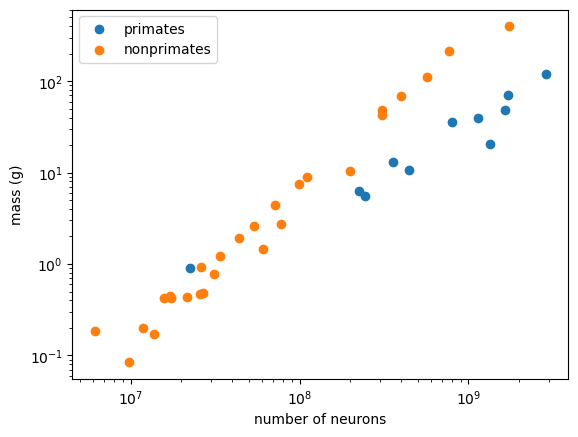

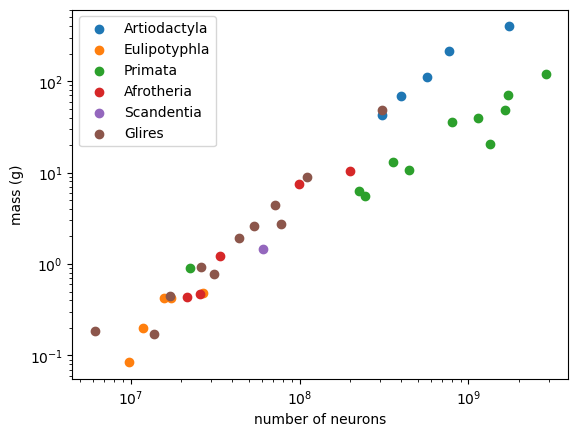

In [92]:
brains_df = pd.read_csv('Data/species_brainmass_neurons.csv')
primate_df = brains_df[brains_df['Order'] == 'Primata']
nonprimate_df = brains_df[brains_df['Order'] != 'Primata']
brains_df.describe()

plt.figure()
plt.scatter(primate_df['Neurons'],primate_df['cortex_mass_g'])
plt.scatter(nonprimate_df['Neurons'],nonprimate_df['cortex_mass_g'])
plt.legend(['primates','nonprimates'])
plt.xlabel('number of neurons')
plt.ylabel('mass (g)')
plt.xscale('log')
plt.yscale('log')
Order_list = set(brains_df['Order'])


plt.figure()
for k in Order_list:
    brains_k_df = brains_df[brains_df['Order'] == k]
    plt.scatter(brains_k_df['Neurons'],brains_k_df['cortex_mass_g'])
    # plt.scatter(brains_df[brains_df['Order'] == k]['Neurons'],brains_df[brains_df['Order'] == k]['cortex_mass_g'])

plt.legend(Order_list)
plt.xlabel('number of neurons')
plt.ylabel('mass (g)')
plt.xscale('log')
plt.yscale('log')


<hr>

## Additional resources
See the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) for a more in depth exploration of Pandas, and of course, the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).